In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sealevel.csv")

# Preview the data
print(df.head())

# Check column names and data types
print(df.info())


   Year  TotalWeightedObservations  GMSL_noGIA  StdDevGMSL_noGIA  \
0  1993                  327401.31      -38.59             89.86   
1  1993                  324498.41      -41.97             90.86   
2  1993                  333018.19      -41.93             87.27   
3  1993                  297483.19      -42.67             90.75   
4  1993                  321635.81      -37.86             90.26   

   SmoothedGSML_noGIA  GMSL_GIA  StdDevGMSL_GIA  SmoothedGSML_GIA  \
0              -38.76    -38.59           89.86            -38.75   
1              -39.78    -41.97           90.86            -39.77   
2              -39.62    -41.91           87.27            -39.61   
3              -39.67    -42.65           90.74            -39.64   
4              -38.75    -37.83           90.25            -38.72   

   SmoothedGSML_GIA_sigremoved  
0                       -38.57  
1                       -39.11  
2                       -38.58  
3                       -38.34  
4          

In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values if necessary
df = df.dropna()  # Drop rows with missing values


Year                           0
TotalWeightedObservations      0
GMSL_noGIA                     0
StdDevGMSL_noGIA               0
SmoothedGSML_noGIA             0
GMSL_GIA                       0
StdDevGMSL_GIA                 0
SmoothedGSML_GIA               0
SmoothedGSML_GIA_sigremoved    0
dtype: int64


In [45]:

# Rename columns
df.rename(columns={
    "Year": "Year",
    "TotalWeightedObservations": "Total_Weighted_Observations",
    "GMSL_noGIA": "Global_Mean_Sea_Level_no_GIA",
    "StdDevGMSL_noGIA": "Standard_Deviation_GMSL_no_GIA",
    "SmoothedGSML_noGIA": "Smoothed_Global_Mean_Sea_Level_no_GIA",
    "GMSL_GIA": "Global_Mean_Sea_Level_with_GIA",
    "StdDevGMSL_GIA": "Standard_Deviation_GMSL_with_GIA",
    "SmoothedGSML_GIA": "Smoothed_Global_Mean_Sea_Level_with_GIA",
    "SmoothedGSML_GIA_sigremoved": "Smoothed_Global_Mean_Sea_Level_with_GIA_Signals_Removed"
}, inplace=True)



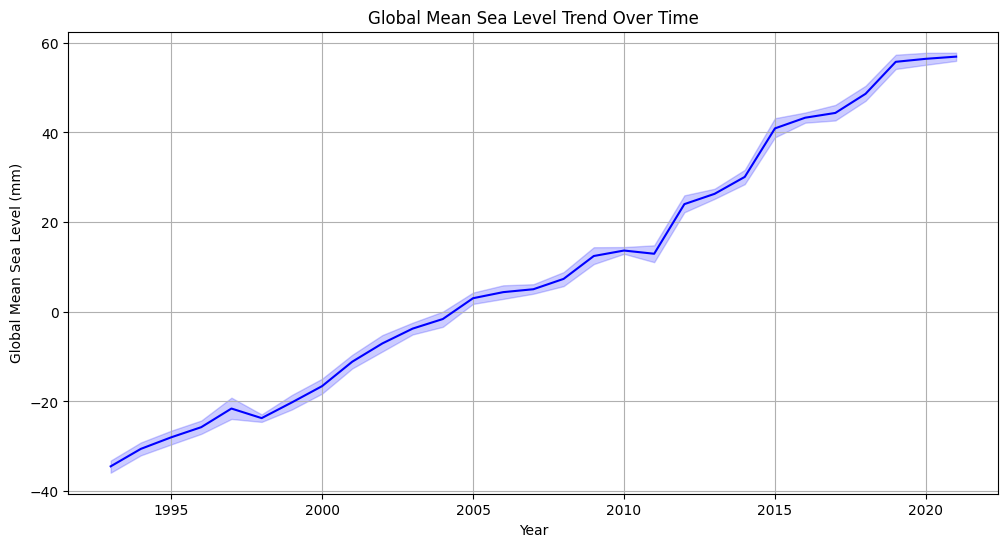

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'sealevel.csv'  # Update the path if necessary
df = pd.read_csv(file_path)

# Rename columns for clarity
df.rename(columns={
    "GMSL_GIA": "Global_Mean_Sea_Level",
}, inplace=True)

# Plot Global Mean Sea Level trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Global_Mean_Sea_Level', color='blue')
plt.title("Global Mean Sea Level Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Global Mean Sea Level (mm)")
plt.grid(True)
plt.show()


C:\Users\Laura Silola\AppData\Local\Temp\ipykernel_10184\1093005030.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Yearly_Change', data=df, palette='coolwarm')


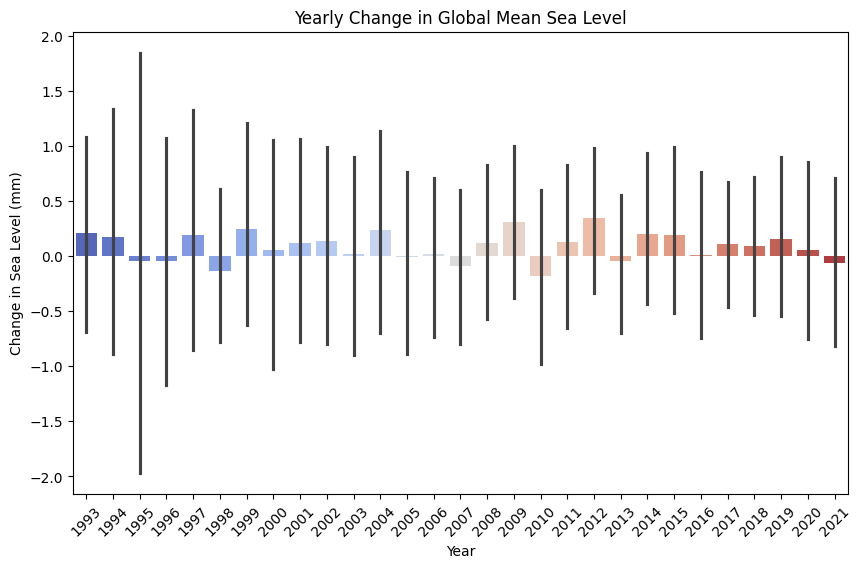

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'sealevel.csv'  # Update the file path if necessary
df = pd.read_csv(file_path)

# Rename the relevant column for clarity
df.rename(columns={
    "GMSL_GIA": "Global_Mean_Sea_Level",
}, inplace=True)

# Calculate yearly change
df['Yearly_Change'] = df['Global_Mean_Sea_Level'].diff()

# Plot yearly change
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Yearly_Change', data=df, palette='coolwarm')
plt.title("Yearly Change in Global Mean Sea Level")
plt.xlabel("Year")
plt.ylabel("Change in Sea Level (mm)")
plt.xticks(rotation=45)
plt.show()


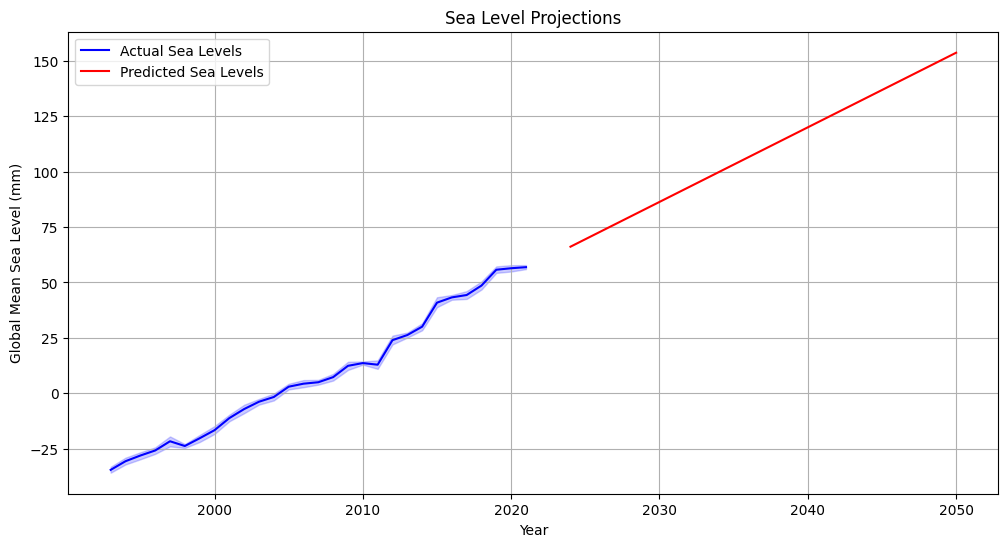

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the CSV file
file_path = 'sealevel.csv'  # Update the file path if necessary
df = pd.read_csv(file_path)

# Rename the relevant column for clarity
df.rename(columns={
    "GMSL_GIA": "Global_Mean_Sea_Level",
}, inplace=True)

# Prepare features (Year) and target (Sea Level)
X = df[['Year']].values  # Independent variable
y = df['Global_Mean_Sea_Level'].values  # Dependent variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future sea levels
future_years = [[year] for year in range(2024, 2051)]  # Example future years
predicted_sea_levels = model.predict(future_years)

# Visualize predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Year'], y=df['Global_Mean_Sea_Level'], label='Actual Sea Levels', color='blue')
sns.lineplot(x=[year[0] for year in future_years], y=predicted_sea_levels, label='Predicted Sea Levels', color='red')
plt.title("Sea Level Projections")
plt.xlabel("Year")
plt.ylabel("Global Mean Sea Level (mm)")
plt.legend()
plt.grid(True)
plt.show()



                       Global_Mean_Sea_Level  Temperature_Anomaly  \
Global_Mean_Sea_Level               1.000000             0.976852   
Temperature_Anomaly                 0.976852             1.000000   
CO2_Emissions                       0.976852             1.000000   

                       CO2_Emissions  
Global_Mean_Sea_Level       0.976852  
Temperature_Anomaly         1.000000  
CO2_Emissions               1.000000  


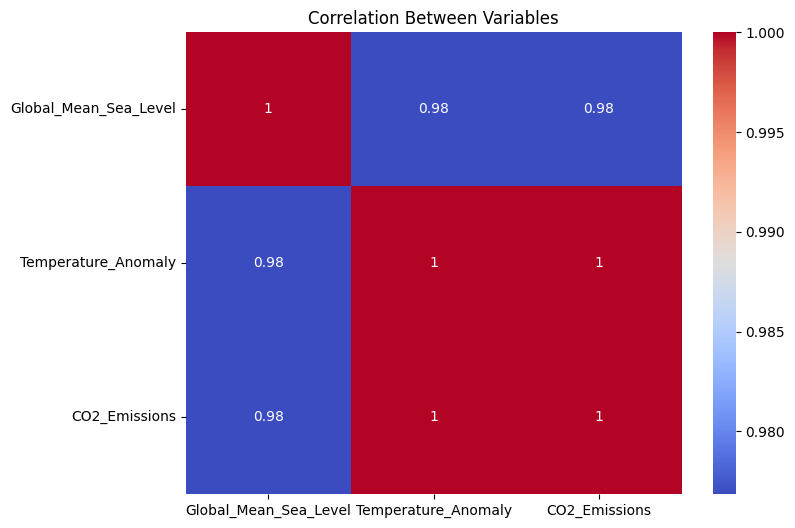

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'sealevel.csv'  # Update the file path if necessary
df = pd.read_csv(file_path)

# Rename the relevant column for clarity
df.rename(columns={
    "GMSL_GIA": "Global_Mean_Sea_Level",
}, inplace=True)

# Add dummy columns for correlation analysis if necessary
df['Temperature_Anomaly'] = df['Year'] * 0.02  # Simulated data (replace with real data if available)
df['CO2_Emissions'] = df['Year'] * 0.5  # Simulated data (replace with real data if available)

# Example correlation analysis
correlation = df[['Global_Mean_Sea_Level', 'Temperature_Anomaly', 'CO2_Emissions']].corr()
print(correlation)

# Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")
plt.show()
